### Outline

#### I. Study Questions and Hypotheses

#### II.  General Data and Code Preparation
        A. Data Loading and Initial Exploration
        B. Custom Function Codes
            1. For Univariate Analyses
            2. For Bivariate Analyses
            3. For Multivariate Analyses
            4. For Modelling

#### III.  Analyses

        A. Univariate Analyses
            1. Age
            2. Sex
            3. Smoker
            4. Comorbidities
                a.  Diabetes (DM)
                b.  Hypertension (HPN)
            5. Imaging: Ejection Fraction (EF)
            6. Laboratory
                a. anemia
                b. Platelet count (Plt)
                c. Serum creatinine (crea)
                d. Serum sodium (Na)
                e. Serum creatinine phosphokinase (CK)
            7. Duration of Follow-up (Ffup)
            8. Mortality

        B. Bivariate Analyses
            1. Mortality - others
                a. age
                b. sex
                c. smoker
                d. DM
                e. HPN
                f. EF
                g. anemia
                h. plt
                i. crea
                j. Na
                k. CK
                l. Ffup

        C. Multivariate Analyses
            1. Mortality - Age - HPN
            2. Mortality - Age - anemia
            3. Mortality - EF - HPN
            4. Mortality - EF - Ff-up
            5. Mortality - Age - EF - Plt
            6. Mortality - Age - EF - crea
            7. Mortality - Age - EF - Na
            8. Mortality - Age - EF - CK
            9. Mortality - Age - EF - Ff-up

        D. Forecasting 
            1.  Linear Regression for Age and EF
            2.  Modelling for Mortality
                - Naive-Bayes
                - k Nearest Neighbors
                - Random Forest Classifier
                - Logistic Regression
                    a. All features
                    b. 6 Selected features
                    c. 3 Selected features

    
#### IV.  Results

#### V.  Conclusion 

#### VI. Limitations and Recommendations

#### I.  Study Questions and Hypotheses:

##### Questions:
1.  Is higher mortality associated with advanced age?
2.  Is higher mortality affected by sex?
3.  What are the effects of smoking, DM and HPN on mortality?
4.  What are the effects of anemia, platelet counts, crea, Na and CK on mortality?
5.  Is there a higher mortality rate with longer follow-up?

##### Hypotheses:

Mortality is associated with advanced age, is higher in males, smokers, and patients with DM and hypertension.  

Anemia, high platelet counts, high crea, low Na and high CK increase mortality rates.  

Mortality rates increase with longer duration of follow-up.

#### II.  General Data and Code Preparation

#### A. Data Loading and Initial Exploration

In [151]:
# Heart Failure: Predictors of Mortality
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# data source: UCI ML repository
hf = pd.read_csv('heart_failure_clinical_records_dataset.csv', header=0,
        names = ['age','anemia','CK','DM','EF','HPN','Plt','crea','Na','sex','smoker','Ffup','mortality']).reindex(columns = ['age','sex','smoker','DM','HPN','EF','anemia','Plt','crea','Na','CK','Ffup','mortality'])
hf.head()

,age,sex,smoker,DM,HPN,EF,anemia,Plt,crea,Na,CK,Ffup,mortality
0,75.0,1,0,0,1,20,0,265000.00,1.9,130,582,4,1
1,55.0,1,0,0,0,38,0,263358.03,1.1,136,7861,6,1
2,65.0,1,1,0,0,20,0,162000.00,1.3,129,146,7,1
3,50.0,1,0,0,0,20,1,210000.00,1.9,137,111,7,1
4,65.0,0,0,1,0,20,1,327000.00,2.7,116,160,8,1


In [3]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        299 non-null    float64
 1   sex        299 non-null    int64  
 2   smoker     299 non-null    int64  
 3   DM         299 non-null    int64  
 4   HPN        299 non-null    int64  
 5   EF         299 non-null    int64  
 6   anemia     299 non-null    int64  
 7   Plt        299 non-null    float64
 8   crea       299 non-null    float64
 9   Na         299 non-null    int64  
 10  CK         299 non-null    int64  
 11  Ffup       299 non-null    int64  
 12  mortality  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
hf.describe()

,age,sex,smoker,DM,HPN,EF,anemia,Plt,crea,Na,CK,Ffup,mortality
count,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,0.648829,0.32107,0.418060,0.351171,38.083612,0.431438,263358.029264,1.39388,136.625418,581.839465,130.260870,0.32107
std,11.894809,0.478136,0.46767,0.494067,0.478136,11.834841,0.496107,97804.236869,1.03451,4.412477,970.287881,77.614208,0.46767
min,40.000000,0.000000,0.00000,0.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,23.000000,4.000000,0.00000
25%,51.000000,0.000000,0.00000,0.000000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,116.500000,73.000000,0.00000
50%,60.000000,1.000000,0.00000,0.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,250.000000,115.000000,0.00000
75%,70.000000,1.000000,1.00000,1.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,582.000000,203.000000,1.00000
max,95.000000,1.000000,1.00000,1.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,7861.000000,285.000000,1.00000


In [5]:
hf.agg(['median', stat.mode])

,age,sex,smoker,DM,HPN,EF,anemia,Plt,crea,Na,CK,Ffup,mortality
median,60.0,1.0,0.0,0.0,0.0,38.0,0.0,262000.00,1.1,137.0,250.0,115.0,0.0
mode,60.0,1.0,0.0,0.0,0.0,35.0,0.0,263358.03,1.0,136.0,582.0,187.0,0.0


In [6]:
# Findings:
# no missing values
# continuous data: age, EF, plt, crea, na, ck, ffup
# categorical data: sex, smoker, dm, hpn, anemia, mortality
# note CK with big diff betweeen median and mean/mode

#### B. Custom Function Codes

###### 1.  For Univariate Analyses

In [7]:
def table_barplot1(var, Varname, label_x):
    val = var.value_counts().sort_index()
    perc = val/ 299 * 100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname,'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'bar', rot=45, figsize = (20,8), fontsize =18, cmap='summer')
    plt.xlabel(label_x, size =22)
    plt.ylabel('Frequency', size =22)
    plt.grid(color = 'black', alpha = 0.2);

In [8]:
def table_barplot2(var, Varname, label_x):
    val = var.value_counts().sort_index()
    perc = val/ 299 * 100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname,'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'bar', rot=0, figsize = (14,6), fontsize =18, cmap='PuOr')
    plt.xlabel(label_x, size =22)
    plt.ylabel('Frequency', size =22)
    plt.grid(color = 'black', alpha = 0.2);

In [9]:
def table_pieplot1(var, Varname, label_0, label_1):
    val = var.value_counts().sort_index()
    perc = val/299 *100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname, 'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'pie', colormap = 'Paired', explode = (0.2,0),
             labels = perc.round(2), shadow = True, startangle=90)
    plt.legend(labels = (label_0, label_1), bbox_to_anchor = (0.9,1), fontsize = 11)

In [10]:
def table_pieplot2(var, Varname, label_0, label_1):
    val = var.value_counts().sort_index()
    perc = val/299 *100
    feature = pd.concat( [val, perc], axis = 1, keys = ['Frequency', '%']).round(2)
    print(Varname, 'Distribution among Heart Failure cohort')
    display(feature)
    val.plot(kind = 'pie', colormap = 'Spectral', explode = (0.2,0),
             labels = perc.round(2), shadow = True, startangle=90)
    plt.legend(labels = (label_0, label_1), bbox_to_anchor = (0.9,1), fontsize = 11)

##### 2. For Bivariate Analyses

In [11]:
def bivariate_table_bar1(var1, title, labelx, tick0, tick1):
    print('Mortality', title)
    val = hf.groupby(var1)['mortality'].value_counts().sort_index()
    ct = hf.groupby(var1) ['mortality'].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 299) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.bar(figsize = (5,5), rot=0, stacked = True,
                           fontsize = 14, cmap= 'tab20b', 
                           legend = False)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1,1))
    plt.ylabel('Frequency', fontsize =14)
    plt.xlabel(labelx, fontsize =14)
    plt.xticks(ticks = (0,1), labels = [tick0, tick1], fontsize =14)

In [12]:
def bivariate_table_bar2(var1, title, labelx):
    print('Mortality', title)
    val = hf.groupby(var1)['mortality'].value_counts().sort_index()
    ct = hf.groupby(var1) ['mortality'].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 299) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.bar(figsize = (7,5), rot=0, stacked = True,
                           fontsize = 14, cmap= 'Accent', 
                           legend = False)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1,1))
    plt.ylabel('Frequency', fontsize =14)
    plt.xlabel(labelx, fontsize =14)

In [13]:
def bivariate_table_bar3(var1, title, labelx):
    print('Mortality', title)
    val = hf.groupby(var1)['mortality'].value_counts().sort_index()
    ct = hf.groupby(var1) ['mortality'].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 299) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.bar(figsize = (10,6), rot=25, stacked = True,
                           fontsize = 14, cmap= 'gnuplot', 
                           legend = False)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1,1))
    plt.ylabel('Frequency', fontsize =14)
    plt.xlabel(labelx, fontsize =14)

In [14]:
def bivariate_table_pieplot1(var2, title):
    print('Mortality Among', title)
    val = hf.groupby('mortality')[var2].value_counts().sort_index()
    ct = hf.groupby('mortality') [var2].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 299) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (30,15), 
                           fontsize = 14, cmap= 'gist_heat', 
                           shadow=True, layout = (6,1), 
                           legend = False, labels = None, 
                           autopct = '%.1f', explode = (0.15,0), startangle=90)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1.9,7))

##### 3. For Multivariate Analyses

In [15]:
def multivariable_scatter(var1, var2, title, label_0, label_1):
    plt.figure(figsize = (6,7))
    sns.scatterplot(hf[var1], hf[var2], hue = hf['mortality'], palette = 'bright', legend = 'full')
    plt.legend(labels = ('Mortality','Survival'), bbox_to_anchor= (1,1))
    plt.xlim(label_0, label_1)
    plt.xlim(right = 1.5, left =-0.5)
    plt.title('Mortality Distribution based on %s'%title)

In [16]:
def multivariable_scatter2(var1, var2, title):
    plt.figure(figsize = (6,6))
    sns.scatterplot(hf[var1], hf[var2], hue = hf['mortality'], palette = 'bright', legend = 'full')
    plt.legend(labels = ('Mortality','Survival'), bbox_to_anchor= (1,1))
    plt.title('Mortality Distribution based on %s'%title)

In [17]:
def multivariable_bubble(varx, vary, varsize, title):
    plt.figure(figsize = (9,9))
    sns.scatterplot(data = hf, x = varx, y = vary, hue = 'mortality',
                   size = varsize, sizes = (15,300), legend = 'brief', alpha = 0.5)
    plt.title('Mortality Status Distribution on the Background of %s'%title)

##### 4. For Modelling

In [146]:
def average_accuracy(model, modelname):
    scores = 0
    list = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
        MinMaxScaler().fit(X_train)
        fitted_model = model.fit(X_train, y_train)
        y_pred = fitted_model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        scores += accuracy
        list.append(accuracy)
    average = (scores / 10).round(2)
    print(modelname, 'Model for Mortality\n', '\nAccuracy Scores = \n', list)
    print('\nAverage Accuracy Score = ', average)

#### III. Analyses

#### A. 1.  Univariate Analysis : Age

In [18]:
hf['age'].agg(['mean','std','median',stat.mode,'min','max'])

mean      60.833893
std       11.894809
median    60.000000
mode      60.000000
min       40.000000
max       95.000000
Name: age, dtype: float64

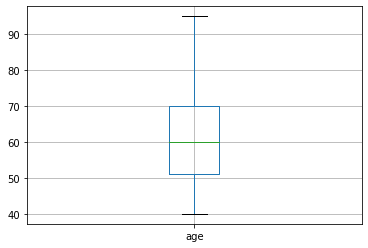

In [19]:
hf.boxplot(['age']);

In [20]:
# bining of age, every 10 years
age_labels = ["40's", "50's", "60's","70's", "80's","90's"]
age_bins = [40,49,59,69,79,89,99]
hf['age_group'] = pd.cut(hf['age'], age_bins, labels = age_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF','anemia','Plt','crea','Na','CK','Ffup','mortality'])

Age Distribution among Heart Failure cohort


,Frequency,%
40's,47,15.72
50's,82,27.42
60's,93,31.10
70's,52,17.39
80's,19,6.35
90's,6,2.01


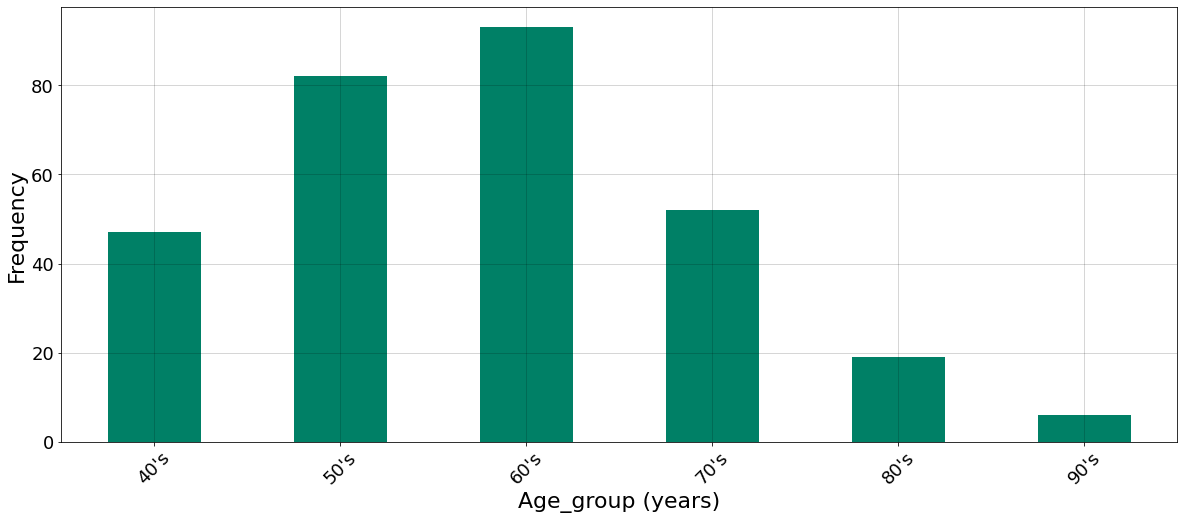

In [21]:
table_barplot1(hf['age_group'], 'Age', 'Age_group (years)')

In [22]:
# Findings:
# normal distribution evident with right skew

#### A. 2.  Univariate Analysis: Sex

In [23]:
# 1 = male; 0 = female

Sex Distribution among Heart Failure cohort


,Frequency,%
0,105,35.12
1,194,64.88


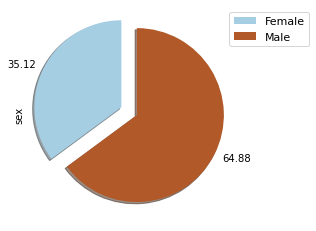

In [24]:
table_pieplot1(hf['sex'], 'Sex','Female','Male')

In [25]:
# Findings:
# Majority of the patients were male at 64.9%

#### A. 3.  Univariate Analysis: Smoker

Smoking Distribution among Heart Failure cohort


,Frequency,%
0,203,67.89
1,96,32.11


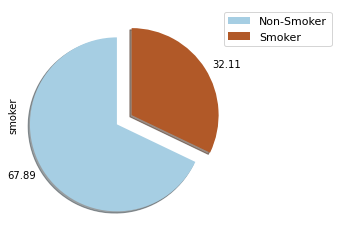

In [26]:
table_pieplot1(hf['smoker'], 'Smoking', 'Non-Smoker','Smoker' )

In [27]:
# Findings:
# majority of the patients were non-smokers, at 67.9%

#### A. 4. a.   Univariate Analysis:  Diabetes Mellitus

Diabetes Mellitus Distribution among Heart Failure cohort


,Frequency,%
0,174,58.19
1,125,41.81


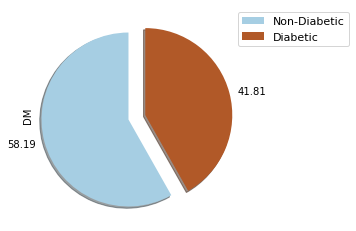

In [28]:
table_pieplot1(hf['DM'], 'Diabetes Mellitus', 'Non-Diabetic','Diabetic')

In [29]:
# Findings:
# majority of the patients were non-diabetic at 58.2%

#### A. 4. b.   Univariate Analysis:  Hypertension

Hypertension Distribution among Heart Failure cohort


,Frequency,%
0,194,64.88
1,105,35.12


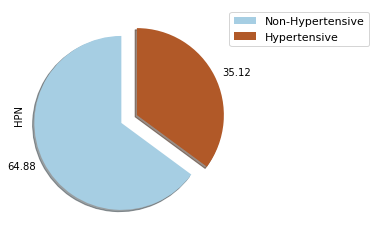

In [30]:
table_pieplot1(hf['HPN'], 'Hypertension', 'Non-Hypertensive','Hypertensive')

In [31]:
# Findings:
# majority of the patients were non-hypertensive (65.9%)

#### A. 5.  Univariate Analysis: EF

In [32]:
hf['EF'].agg(['mean','std','median',stat.mode,'min','max'])

mean      38.083612
std       11.834841
median    38.000000
mode      35.000000
min       14.000000
max       80.000000
Name: EF, dtype: float64

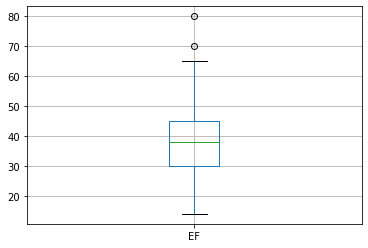

In [33]:
hf.boxplot(['EF']);

In [34]:
# bining of EF, every 10 
EF_labels = ["10's", "20's", "30's", "40's","50's", ">=60's"]
EF_bins = [10, 19, 29, 39, 49, 59, 89]
hf['EF_group'] = pd.cut(hf['EF'], EF_bins, labels = EF_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF', 'EF_group','anemia','Plt','crea','Na','CK','Ffup','mortality'])

Ejection Fraction Distribution among Heart Failure cohort


,Frequency,%
10's,5,1.67
20's,54,18.06
30's,123,41.14
40's,57,19.06
50's,24,8.03
>=60's,36,12.04


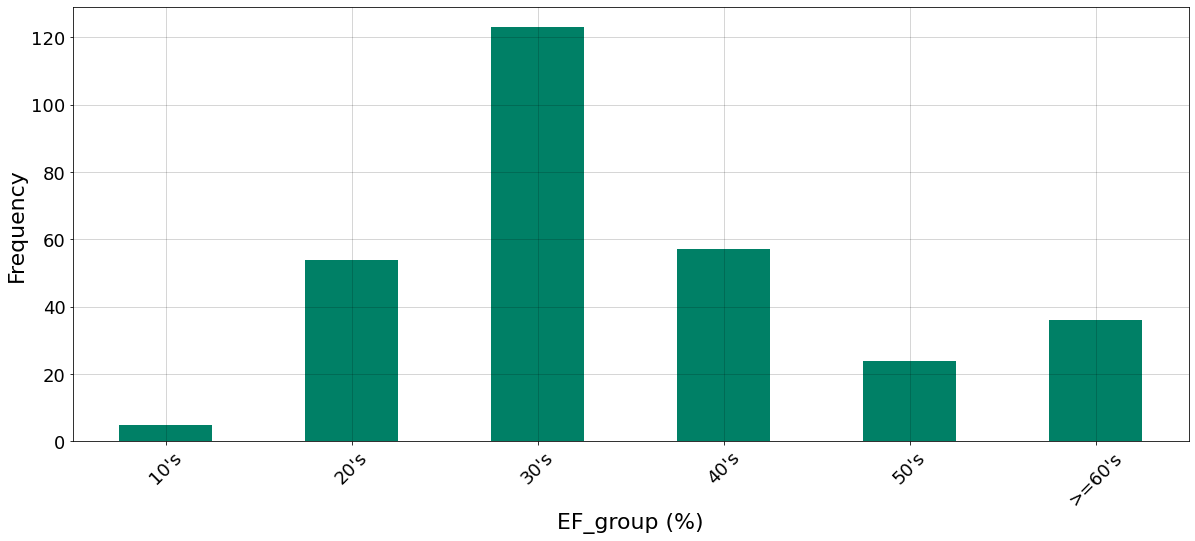

In [35]:
table_barplot1(hf['EF_group'], 'Ejection Fraction','EF_group (%)')

In [36]:
# Findings:
# EF is low, mean of 38 (range 14-80)
# majority had EF on the 30's
# more than 10% had EF of 60% or higher

#### A. 6. a.  Univariate Analyses : Laboratory anemia

Laboratory Anemia Distribution among Heart Failure cohort


,Frequency,%
0,170,56.86
1,129,43.14


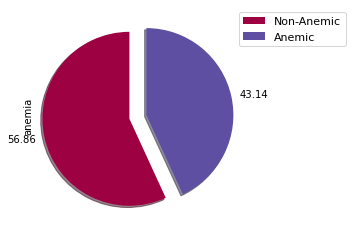

In [37]:
table_pieplot2(hf['anemia'], 'Laboratory Anemia', 'Non-Anemic','Anemic')

In [38]:
# Findings:
# Almost half of the patients had laboratory evidence of anemia

#### A. 6. b.  Univariate Analyses : platelet count

In [39]:
hf['Plt'].agg(['mean','std','median',stat.mode,'min','max'])

mean      263358.029264
std        97804.236869
median    262000.000000
mode      263358.030000
min        25100.000000
max       850000.000000
Name: Plt, dtype: float64

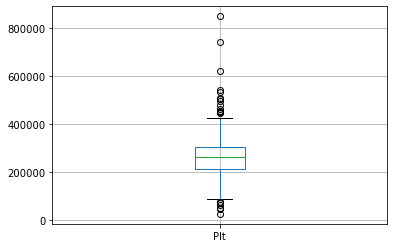

In [40]:
hf.boxplot(['Plt']);

In [41]:
# bining of Plt, every 100
hf['Plt2'] =  (hf['Plt']/ 1000).round(1)
plt_labels = ["<=100", "101-200", "201-300", "301-400",">400"]
plt_bins = [0, 100, 200, 300, 400, 900]
hf['Plt_group'] = pd.cut(hf['Plt2'], plt_bins, labels = plt_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF', 'EF_group','anemia','Plt', 'Plt_group','crea','Na','CK','Ffup','mortality'])

Platelet Count Distribution among Heart Failure cohort


,Frequency,%
<=100,8,2.68
101-200,55,18.39
201-300,156,52.17
301-400,60,20.07
>400,20,6.69


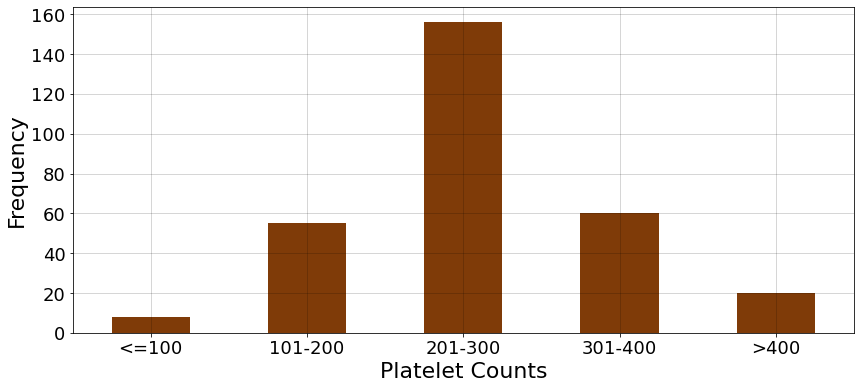

In [42]:
table_barplot2(hf['Plt_group'], 'Platelet Count','Platelet Counts')

In [43]:
# Findings:
# Most of the patients had normal platelet counts between 100 to 400

#### A. 6. c.  Univariate Analyses :  Creatinine

In [44]:
hf['crea'].agg(['mean','std','median',stat.mode,'min','max'])

mean      1.39388
std       1.03451
median    1.10000
mode      1.00000
min       0.50000
max       9.40000
Name: crea, dtype: float64

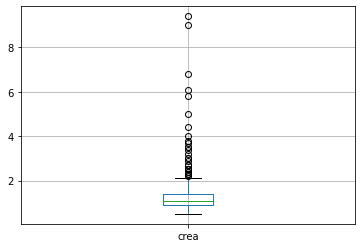

In [45]:
hf.boxplot(['crea']);

In [46]:
# bining of crea, every 100
hf['crea'] =  (hf['crea']*100).round()
crea_labels = ["0-100", "101-200", "201-300","301-400","401-500", ">500"]
crea_bins = [0, 100,  200,  300,  400,  500, 1000]
hf['crea_group'] = pd.cut(hf['crea'], crea_bins, labels = crea_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF', 'EF_group','anemia','Plt', 'Plt_group','crea', 'crea_group','Na','CK','Ffup','mortality'])

Serum Creatinine Distribution among Heart Failure cohort


,Frequency,%
0-100,131,43.81
101-200,134,44.82
201-300,20,6.69
301-400,7,2.34
401-500,2,0.67
>500,5,1.67


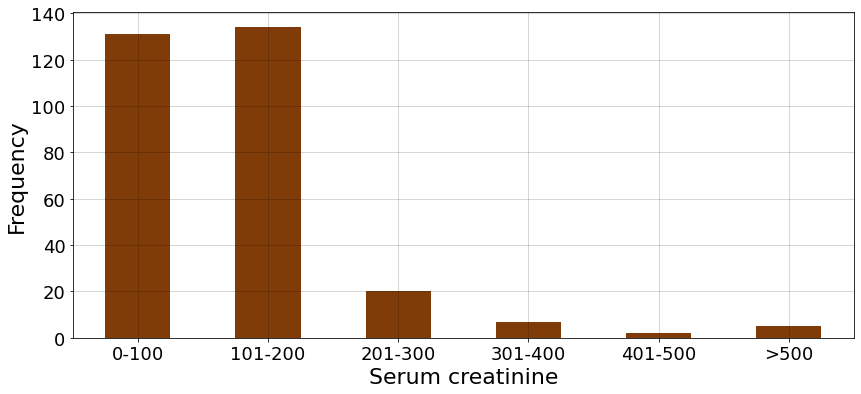

In [47]:
table_barplot2(hf['crea_group'], 'Serum Creatinine','Serum creatinine')

In [48]:
# Findings:
# Majority of the patients had normal crea levels from 50 to less than 200

#### A. 6. d.  Univariate Analyses :  Na

In [49]:
hf['Na'].agg(['mean','std','median',stat.mode,'min','max'])

mean      136.625418
std         4.412477
median    137.000000
mode      136.000000
min       113.000000
max       148.000000
Name: Na, dtype: float64

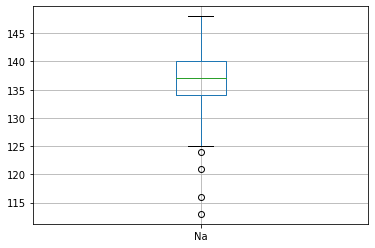

In [50]:
hf.boxplot(['Na']);

In [51]:
# bining of Na, every 10 from 130
Na_labels = ["<=130", "131-140",  ">140"]
Na_bins = [110, 130,  140,  150]
hf['Na_group'] = pd.cut(hf['Na'], Na_bins, labels = Na_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF', 'EF_group','anemia','Plt', 'Plt_group','crea', 'crea_group','Na','Na_group','CK','Ffup','mortality'])

Serum Sodium Distribution among Heart Failure cohort


,Frequency,%
<=130,22,7.36
131-140,235,78.60
>140,42,14.05


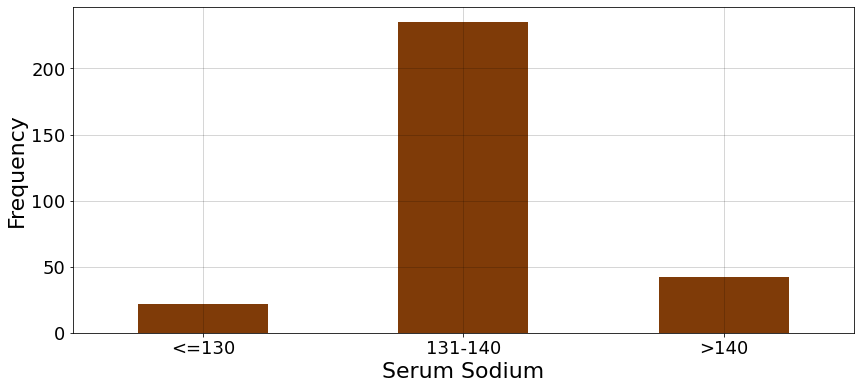

In [52]:
table_barplot2(hf['Na_group'], 'Serum Sodium','Serum Sodium')

In [53]:
# Findings:
# Majority of the patients had normal serum Na from 131-140

#### A. 6. e.  Univariate Analyses :  CK

In [54]:
hf['CK'].agg(['mean','std','median',stat.mode,'min','max'])

mean       581.839465
std        970.287881
median     250.000000
mode       582.000000
min         23.000000
max       7861.000000
Name: CK, dtype: float64

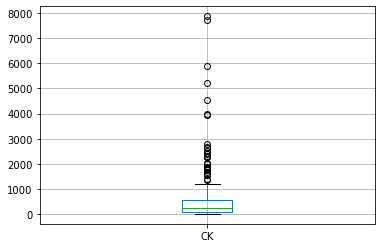

In [55]:
hf.boxplot(['CK']);

In [56]:
# bining of CK, every 500
CK_labels = ["0-500", "501-1000","1001-1500", "1501-2000","2001-2500","2501-3000", ">3000"]
CK_bins = [0, 500, 1000,  1500,  2000, 2500, 3000, 9000]
hf['CK_group'] = pd.cut(hf['CK'], CK_bins, labels = CK_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF', 'EF_group','anemia','Plt', 'Plt_group','crea', 'crea_group','Na','Na_group','CK', 'CK_group','Ffup','mortality'])

Serum Creatinine Prosphokinase Distribution among Heart Failure cohort


,Frequency,%
0-500,183,61.20
501-1000,80,26.76
1001-1500,9,3.01
1501-2000,9,3.01
2001-2500,7,2.34
2501-3000,4,1.34
>3000,7,2.34


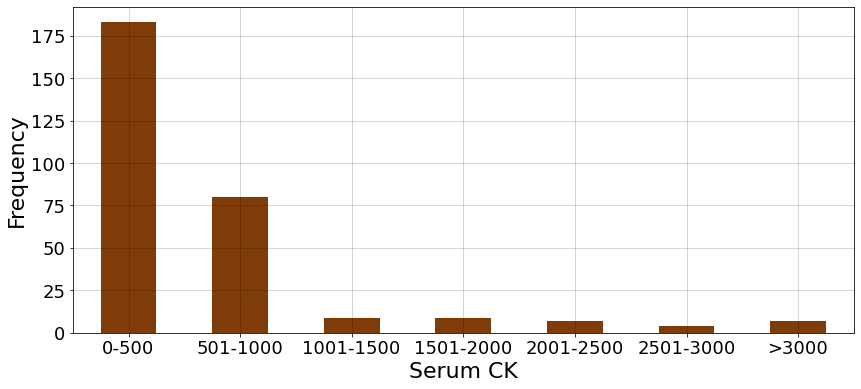

In [57]:
table_barplot2(hf['CK_group'], 'Serum Creatinine Prosphokinase','Serum CK')

In [58]:
# Findings
# Majority had low CK levels
# mean of 581, median of 250, range 23-7861, skew to the right

#### A. 7.  Univariate Analyses :   Duration of Follow-up

In [59]:
hf['Ffup'].agg(['mean','std','median',stat.mode,'min','max'])

mean      130.260870
std        77.614208
median    115.000000
mode      187.000000
min         4.000000
max       285.000000
Name: Ffup, dtype: float64

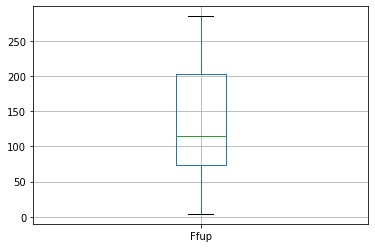

In [60]:
hf.boxplot(['Ffup']);

In [61]:
# bining of Ffup, every 30 days
Ffup_labels = ["0-30", "31-60", "61-90", "91-120", "121-150", "151-180","181-210", "211-240", ">240"]
Ffup_bins = [0, 30, 60, 90 , 120, 150, 180, 210, 240, 300]
hf['Ffup_group'] = pd.cut(hf['Ffup'], Ffup_bins, labels = Ffup_labels, include_lowest=True)
hf = hf.reindex(columns = ['age','age_group','sex','smoker','DM','HPN','EF', 'EF_group','anemia','Plt', 'Plt_group','crea', 'crea_group','Na','Na_group','CK', 'CK_group','Ffup','Ffup_group','mortality'])

Duration of Follow-up (days) Distribution among Heart Failure cohort


,Frequency,%
0-30,40,13.38
31-60,23,7.69
61-90,51,17.06
91-120,44,14.72
121-150,24,8.03
151-180,14,4.68
181-210,43,14.38
211-240,27,9.03
>240,33,11.04


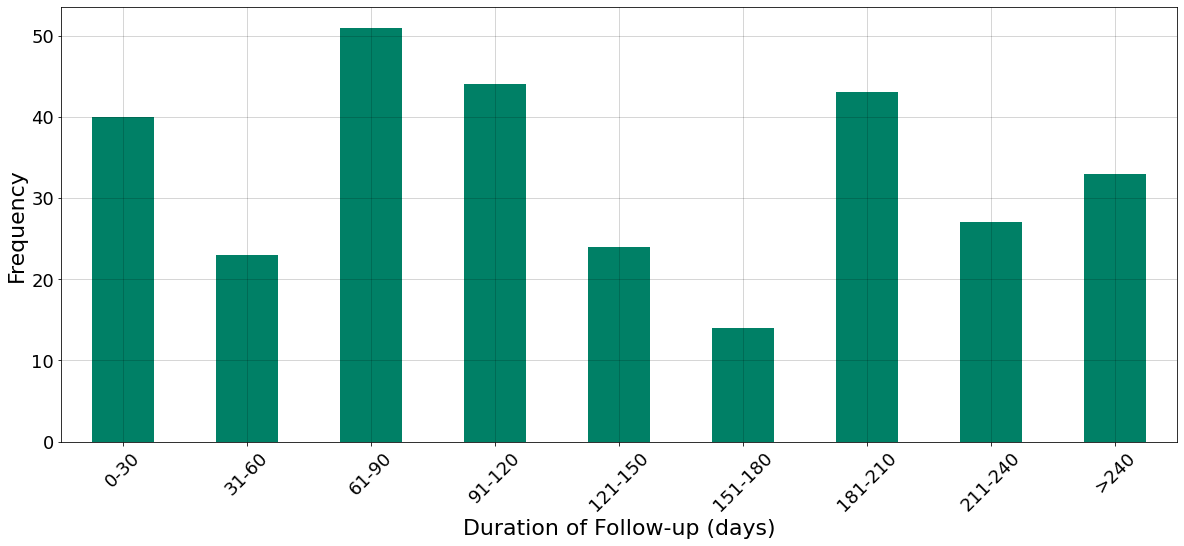

In [62]:
table_barplot1(hf['Ffup_group'], 'Duration of Follow-up (days)', 'Duration of Follow-up (days)')

In [63]:
# Findings:
# mean of 130, median 115 days, mode of 187, range 4-285 days
# no consistent pattern up to 8-9 months

#### A. 8.  Univariate Analyses :  Mortality

Mortality Status Distribution among Heart Failure cohort


,Frequency,%
0,203,67.89
1,96,32.11


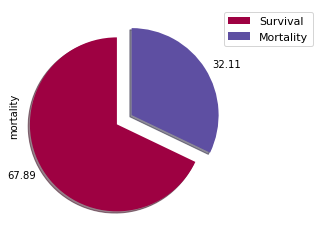

In [64]:
table_pieplot2(hf['mortality'], 'Mortality Status', 'Survival','Mortality')

In [65]:
# Findings:
# There is a high mortality of 32.1% during the follow-up period

In [66]:
# Summary of Findings for Univariate Analyses:

# Age - seeming normal distribution starting at age 40, peaking at 60, skewed to the right towards the 90's
#     - most frequent occurence is on the 60's age group, followed by the 50's
# Sex - Majority of the patients were male at 64.9%
# Smoker - majority of the patients were non-smokers, at 67.9%
# DM - majority of the patients were non-diabetic at 58.2%
# HPN- majority of the patients were non-hypertensive (65.9%)
# EF - EF is low, mean of 38 (14-80)
#     - majority had EF on the 30's
#     - more than 10% had EF of 60% or higher
# Anemia - Almost half of the patients had laboratory evidence of anemia
# Plt count - Most of the patients had normal platelet counts between 100 to 400
# Crea - Majority of the patients had normal crea levels from 50 to less than 200
# Na - Majority of the patients had normal serum Na from 131-140
# CK - Majority had low CK levels
#     - mean of 581, median of 250, range 23-7861, skew to the right
# Ffup - mean of 130, mode of 187, median 115 days, range 4-285 days
#      - no consistent pattern up to 8-9 months
# Mortality - There is a high mortality of 32.1% during the follow-up period

#### B. 1. a.  Bivariate Analysis :  Mortality - Age

Mortality Among Age groups


Frequency  % per group  % overall
mortality age_group                                   
0         40's              36        17.73      12.04
          50's              62        30.54      20.74
          60's              66        32.51      22.07
          70's              32        15.76      10.70
          80's               6         2.96       2.01
          90's               1         0.49       0.33
1         40's              11        11.46       3.68
          50's              20        20.83       6.69
          60's              27        28.12       9.03
          70's              20        20.83       6.69
          80's              13        13.54       4.35
          90's               5         5.21       1.67

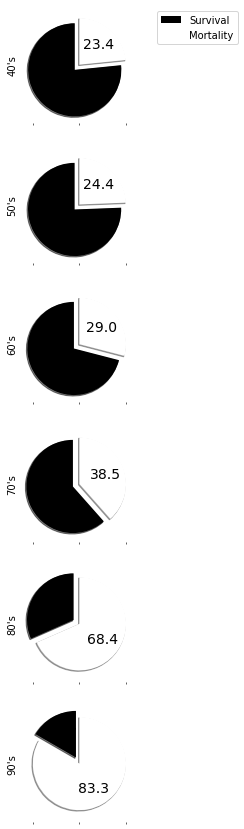

In [67]:
bivariate_table_pieplot1('age_group', 'Age groups')

In [68]:
# Findings:
# Mortality increases with advancing age group

#### B. 1. b.  Bivariate Analysis :  Mortality - Sex

Mortality Between the two Sexes


Frequency  % per group  % overall
sex mortality                                   
0   0                 71        67.62      23.75
    1                 34        32.38      11.37
1   0                132        68.04      44.15
    1                 62        31.96      20.74

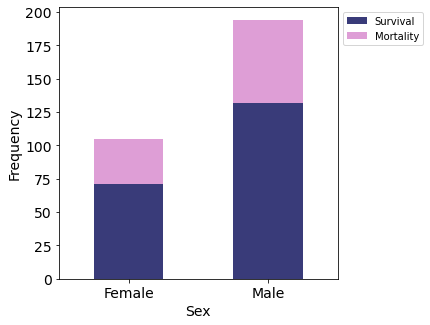

In [69]:
bivariate_table_bar1('sex', 'Between the two Sexes', 'Sex','Female','Male')

In [70]:
# Findings:
# The biggest group is those of male survivors, at 44.1% of the overall population
# There is an equal proportion of mortalities between the two sexes, approximately 32%

#### B. 1. c.  Bivariate Analysis :  Mortality - Smoker

Mortality and Smoking Status


Frequency  % per group  % overall
smoker mortality                                   
0      0                137        67.49      45.82
       1                 66        32.51      22.07
1      0                 66        68.75      22.07
       1                 30        31.25      10.03

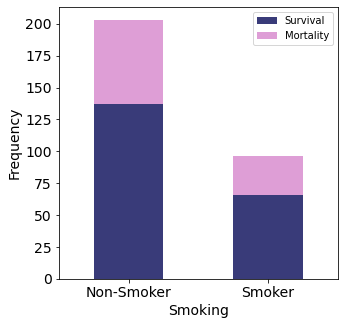

In [71]:
bivariate_table_bar1('smoker', 'and Smoking Status','Smoking','Non-Smoker','Smoker')

In [72]:
# Findings:
# A third of the patients were smokers
# There was an equivalent percentage of smokers among survivors and mortalities, about 32%

#### B. 1. d.  Bivariate Analysis :  Mortality - DM 

Mortality and Diabetic Status


Frequency  % per group  % overall
DM mortality                                   
0  0                118        67.82      39.46
   1                 56        32.18      18.73
1  0                 85        68.00      28.43
   1                 40        32.00      13.38

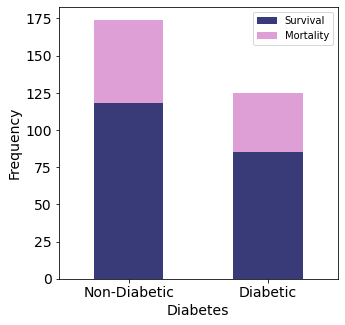

In [73]:
bivariate_table_bar1(hf['DM'], 'and Diabetic Status','Diabetes','Non-Diabetic','Diabetic')

In [74]:
# Findings:
# Mortality - DM -  There is an equivalent proportion of deaths among patients with or without DM (about 32%)

#### B. 1. e.  Bivariate Analysis :  Mortality - HPN

Mortality and Hypertensive Status


Frequency  % per group  % overall
HPN mortality                                   
0   0                137        70.62      45.82
    1                 57        29.38      19.06
1   0                 66        62.86      22.07
    1                 39        37.14      13.04

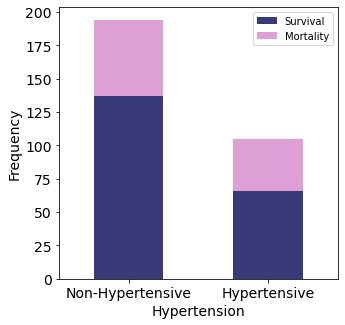

In [75]:
bivariate_table_bar1(hf['HPN'], 'and Hypertensive Status','Hypertension','Non-Hypertensive','Hypertensive')

In [76]:
# Findings:
# Mortality - HPN -  There is a slightly higher percentage of death among hypertensives (37 vs 29%)

#### B. 1. f.  Bivariate Analysis :  Mortality - EF

Mortality Among EF groups


Frequency  % per group  % overall
mortality EF_group                                   
0         10's              1         0.49       0.33
          20's             20         9.85       6.69
          30's             88        43.35      29.43
          40's             48        23.65      16.05
          50's             17         8.37       5.69
          >=60's           29        14.29       9.70
1         10's              4         4.17       1.34
          20's             34        35.42      11.37
          30's             35        36.46      11.71
          40's              9         9.38       3.01
          50's              7         7.29       2.34
          >=60's            7         7.29       2.34

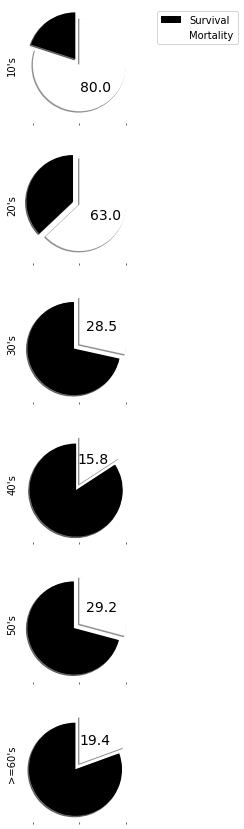

In [77]:
bivariate_table_pieplot1('EF_group', 'EF groups')

In [78]:
# Findings:
# In general, mortality rates increase as EF decrease
# There is a sudden increase in mortality at EF lower than 30, reaching mortality rates of 80% at very low EF <=10% 

#### B. 1. g.  Bivariate Analysis :  Mortality - anemia

Mortality and Anemia Status


Frequency  % per group  % overall
anemia mortality                                   
0      0                120        70.59      40.13
       1                 50        29.41      16.72
1      0                 83        64.34      27.76
       1                 46        35.66      15.38

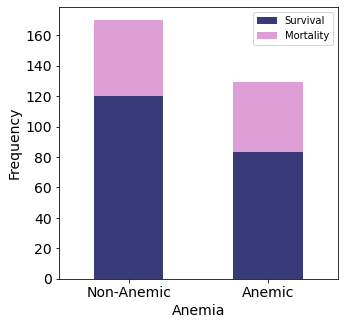

In [79]:
bivariate_table_bar1(hf['anemia'], 'and Anemia Status','Anemia','Non-Anemic','Anemic')

In [80]:
# Findings:
# There is a slightly higher mortality for anemic patients (35.7 vs 29.4%)

#### B. 1. h.  Bivariate Analysis :  Mortality - platelet

Mortality And Platelet Counts


Frequency  % per group  % overall
Plt_group mortality                                   
<=100     0                  3        37.50       1.00
          1                  5        62.50       1.67
101-200   0                 34        61.82      11.37
          1                 21        38.18       7.02
201-300   0                113        72.44      37.79
          1                 43        27.56      14.38
301-400   0                 39        65.00      13.04
          1                 21        35.00       7.02
>400      0                 14        70.00       4.68
          1                  6        30.00       2.01

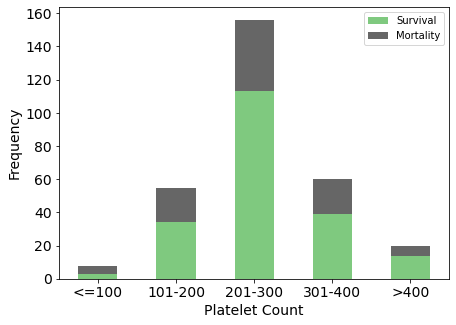

In [81]:
bivariate_table_bar2(hf['Plt_group'], 'And Platelet Counts','Platelet Count')

In [82]:
# Findings:
# There is a higher proportion of deaths for patients with platelet counts <=100 (62.5%)

#### B. 1. i.  Bivariate Analysis :  Mortality - creatinine

Mortality Among Serum Creatinine groups


Frequency  % per group  % overall
mortality crea_group                                   
0         0-100             107        52.71      35.79
          101-200            83        40.89      27.76
          201-300             7         3.45       2.34
          301-400             4         1.97       1.34
          401-500             1         0.49       0.33
          >500                1         0.49       0.33
1         0-100              24        25.00       8.03
          101-200            51        53.12      17.06
          201-300            13        13.54       4.35
          301-400             3         3.12       1.00
          401-500             1         1.04       0.33
          >500                4         4.17       1.34

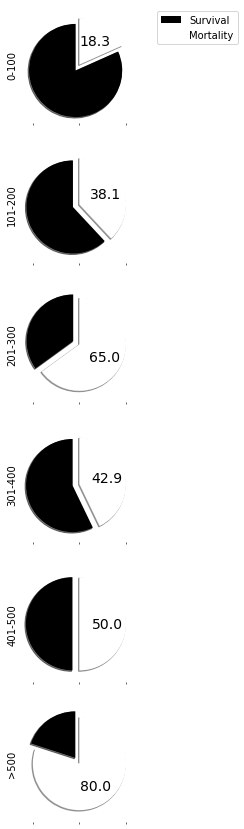

In [83]:
bivariate_table_pieplot1('crea_group', 'Serum Creatinine groups')

In [84]:
# Findings:
# Increased mortality is associated with increasing crea starting at 100.
# Crea of >500 is associated with 80% mortality

#### B. 1. j.  Bivariate Analysis :  Mortality - serum Na

Mortality And Serum Sodium Level


Frequency  % per group  % overall
Na_group mortality                                   
<=130    0                 10        45.45       3.34
         1                 12        54.55       4.01
131-140  0                162        68.94      54.18
         1                 73        31.06      24.41
>140     0                 31        73.81      10.37
         1                 11        26.19       3.68

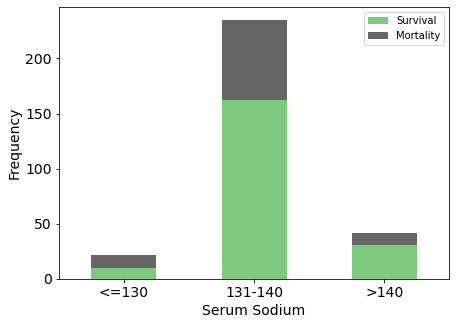

In [85]:
bivariate_table_bar2(hf['Na_group'], 'And Serum Sodium Level','Serum Sodium')

In [86]:
# Findings:
# Increased mortality was associated with patients who had serum Na of 130 or less 

#### B. 1. k.  Bivariate Analysis :  Mortality - serum CK

Mortality And Serum Creatinine Phosphokinase Level


Frequency  % per group  % overall
CK_group  mortality                                   
0-500     0                124        67.76      41.47
          1                 59        32.24      19.73
501-1000  0                 53        66.25      17.73
          1                 27        33.75       9.03
1001-1500 0                  7        77.78       2.34
          1                  2        22.22       0.67
1501-2000 0                  8        88.89       2.68
          1                  1        11.11       0.33
2001-2500 0                  4        57.14       1.34
          1                  3        42.86       1.00
2501-3000 0                  4       100.00       1.34
>3000     0                  3        42.86       1.00
          1                  4        57.14       1.34

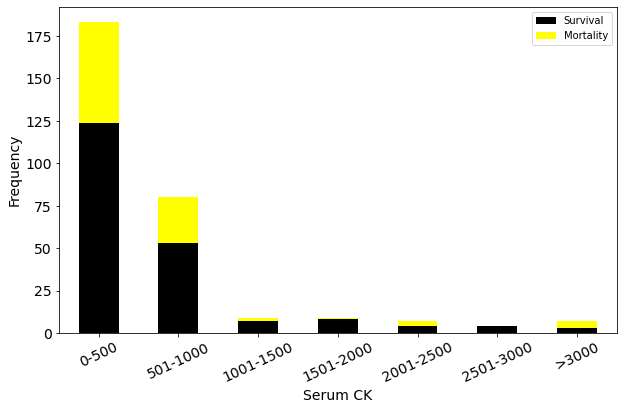

In [87]:
bivariate_table_bar3(hf['CK_group'], 'And Serum Creatinine Phosphokinase Level','Serum CK')

In [88]:
# Findings:
# Mortality for lower CK levels <500 was already elevated at 32.2%
# Patterns on midvalues were not apparent
# Increased mortality was associated with CK levels of at least 3000 (57.1%)

#### B. 1. l.  Bivariate Analysis :  Mortality - Duration of Follow-up

Mortality And Duration of Follow-up (Days)


Frequency  % per group  % overall
Ffup_group mortality                                   
0-30       0                  5        12.50       1.67
           1                 35        87.50      11.71
31-60      0                  4        17.39       1.34
           1                 19        82.61       6.35
61-90      0                 36        70.59      12.04
           1                 15        29.41       5.02
91-120     0                 37        84.09      12.37
           1                  7        15.91       2.34
121-150    0                 19        79.17       6.35
           1                  5        20.83       1.67
151-180    0                  6        42.86       2.01
           1                  8        57.14       2.68
181-210    0                 39        90.70      13.04
           1                  4         9.30       1.34
211-240    0                 25        92.59       8.36
           1                  2         7.41       0.67
>240       0                 32        96.97      10.70
           1                  1         3.03       0.33

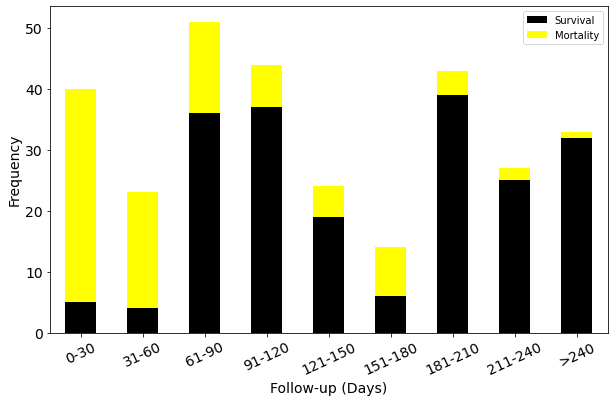

In [89]:
bivariate_table_bar3(hf['Ffup_group'], 'And Duration of Follow-up (Days)','Follow-up (Days)')

In [90]:
# Findings:
# There was a higher mortality for those with a shorter duration of follow-up, up to 60 days

In [91]:
# Summary of Findings for Bivariate Analyses:

# Mortality - Age  -  Mortality increases with advancing age group
# Mortality - Sex  -  The biggest group is those of male survivors, at 44.1% of the overall population
#                  -  There is an equal proportion of mortalities between the two sexes, approximately 32%
# Mortality - Smoker -  A third of the patients were smokers
#                    -  There was an equivalent percentage of smokers among survivors and mortalities, about 32%
# Mortality - DM -  There is an equivalent proportion of deaths among patients with or without DM (about 32%)
# Mortality - HPN -  There is a slightly higher percentage of death among hypertensives (37 vs 29%)
# Mortality - EF -   In general, mortality rates increase as EF decrease
#                -  There is a sudden increase in mortality at EF lower than 30, reaching mortality rates of 80% at very low EF <=10%
# Mortality - anemia -  There is a slightly higher mortality for anemic patients (35.7 vs 29.4%)
# Mortality - platelet -  There is a higher proportion of deaths for patients with platelet counts <=100 (62.5%)
# Mortality - creatinine -  Increased mortality is associated with increasing crea starting at 200.
#                        -  Crea of >500 is associated with 80% mortality
# Mortality - Na -  Increased mortality was associated with patients who had serum Na of 130 or less 
# Mortality - CK -  Mortality for lower CK levels <500 was already elevated at 32.2%
#                -  Patterns on midvalues were not apparent
#                -  Increased mortality was associated with CK levels of at least 3000 (57.1%)
# Mortality - Follow-up -  There was a higher mortality for those with a shorter duration of follow-up, up to 60 days

#### C.1.  Multivariate Analysis :  Mortality - Age - HPN

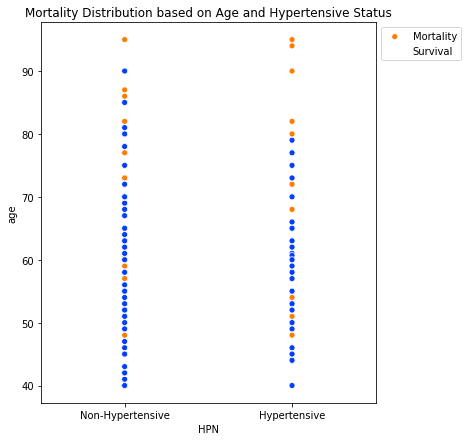

In [92]:
multivariable_scatter('HPN','age', 'Age and Hypertensive Status', 'Non-Hypertensive','Hypertensive')

In [93]:
# Findings:
# There seems to be a higher incidence of young deaths on the hypertensive patients

#### C.2.  Multivariate Analysis :  Mortality - Age - anemia

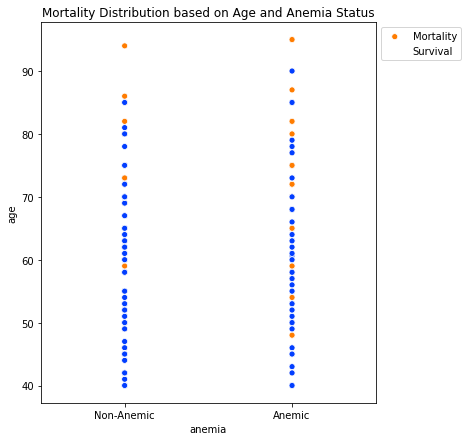

In [94]:
multivariable_scatter('anemia','age', 'Age and Anemia Status', 'Non-Anemic','Anemic')

In [95]:
# Findings:
#  There is a tendency for younger deaths in anemic patients

#### C.3.  Multivariate Analysis :  Mortality - EF - HPN

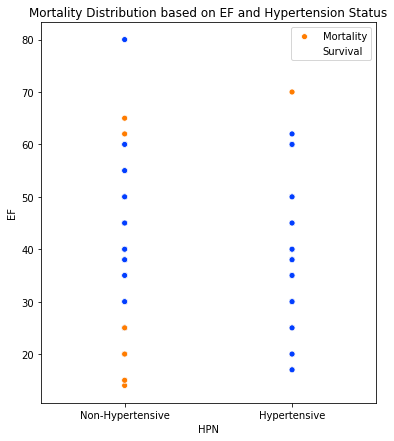

In [96]:
multivariable_scatter('HPN','EF', 'EF and Hypertension Status', 'Non-Hypertensive','Hypertensive')

In [97]:
# Findings:
#  There is an association between Mortality, low EF and a non-hypertensive status

#### C.4.  Multivariate Analysis :  Mortality - EF - Duration of Follow-up

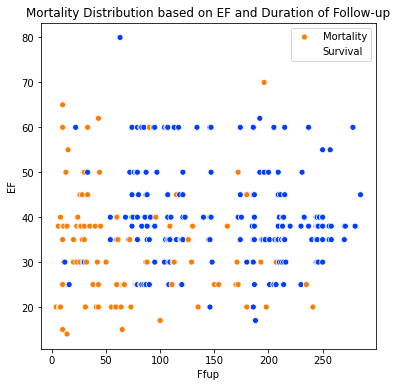

In [98]:
multivariable_scatter2('Ffup','EF', 'EF and Duration of Follow-up')

In [99]:
# Findings:
# The mortalites clustered around the first 60 days comprised of both low and normal EFs, but majority had EFs of less than 40
# For patients with EF of 30 and above, after surviving the first 60 days, survival is mostly sustained for the next 100 days

#### C.5.  Multivariate Analysis :  Mortality - Age - EF - Platelet count

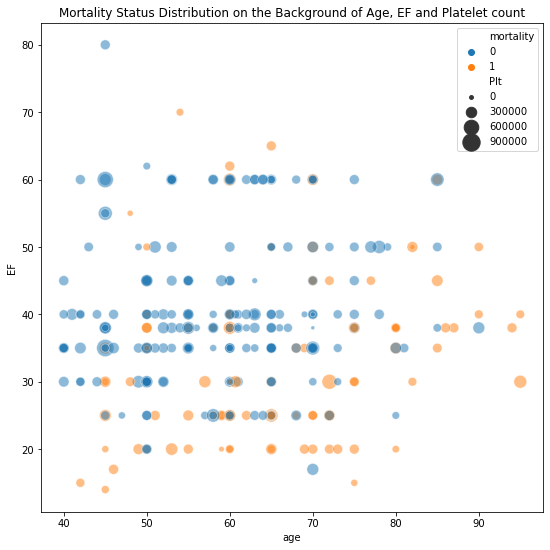

In [100]:
multivariable_bubble('age','EF','Plt', 'Age, EF and Platelet count')

In [101]:
# Findings:
# There is low survival with EFs lower than 30, and age higher than 70
# There is no noticeable pattern on platelet count distribution with regards to the three other variables

#### C.6.  Multivariate Analysis :  Mortality - Age - EF - Serum Creatinine

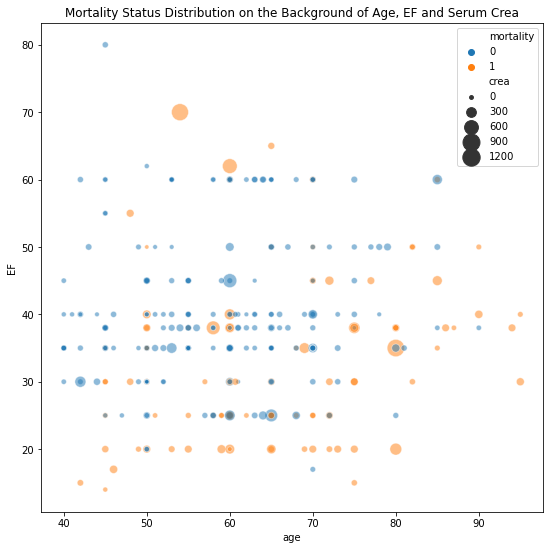

In [102]:
multivariable_bubble('age','EF','crea', 'Age, EF and Serum Crea')

In [103]:
# Findings:
# There is a possible association between higher crea levels in low EF mortalities
# Elevated crea levels are associated with mortalities
# Very elevated crea levels were not associated with low-EF mortalities

#### C.7.  Multivariate Analysis :  Mortality - Age - EF - Serum Sodium

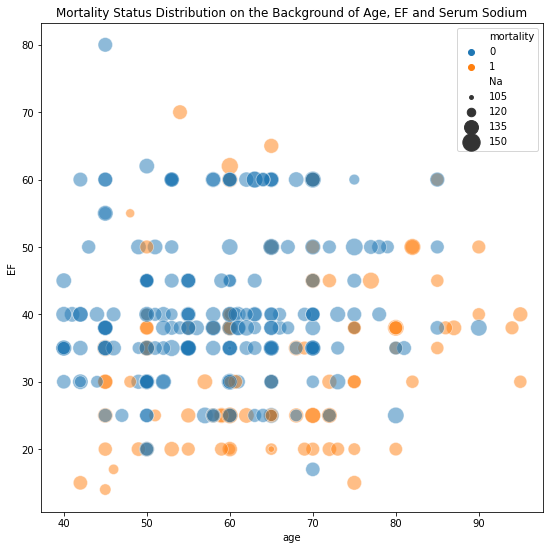

In [104]:
multivariable_bubble('age','EF','Na', 'Age, EF and Serum Sodium')

In [105]:
# Findings:
# Mortalities are more associated with low sodium, but has no convincing pattern with regards to age and EF

#### C.8.  Multivariate Analysis :  Mortality - Age - EF - Serum CK

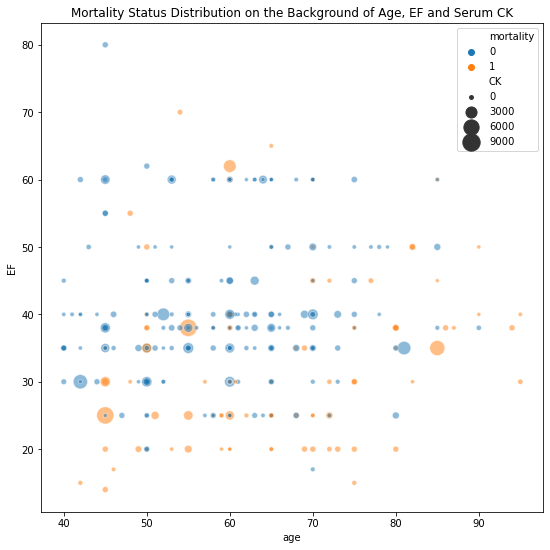

In [106]:
multivariable_bubble('age','EF','CK', 'Age, EF and Serum CK')

In [107]:
# Findings:
# There seems to be an association with mortality for low EF and low CK levels
# Hypothesis generation: Is the heart muscles already too degenerated to release high CK during further injury?

#### C.9.  Multivariate Analysis :  Mortality - Age - EF - Duration of Follow-Up

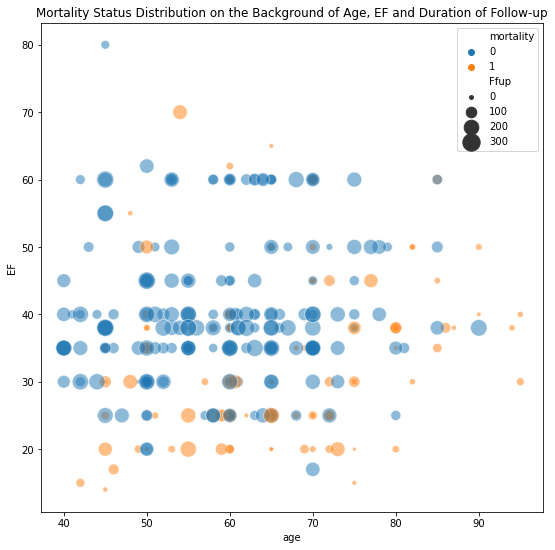

In [108]:
multivariable_bubble('age','EF','Ffup', 'Age, EF and Duration of Follow-up')

In [109]:
# Findings:
# There is a trend of short duration follow-up (early mortality?) for patients with low EF and advanced age

In [110]:
# Summary of Findings for Multivariate Analyses:

# Mortality - Age - HPN -  There seems to be a higher incidence of young deaths on the hypertensive patients
# Mortality - Age - anemia -   There is a tendency for younger deaths in anemic patients

# Mortality - EF - HPN -   There is an association between Mortality, low EF and a non-hypertensive status
# Mortality - EF - Ffup -  The mortalites clustered around the first 60 days comprised of both low and normal EFs, but majority had EFs of less than 40
#                       - For patients with EF of 30 and above, after surviving the first 60 days, survival is mostly sustained for the next 100 days

# Mortality - Age - EF -  There is low survival with EFs lower than 30, and age higher than 70
# Mortality - Age - EF - Platelet -  There is no noticeable pattern on platelet count distribution with regards to the three other variables
# Mortality - Age - EF - crea - There is a possible association between higher crea levels in low EF mortalities
#                             - Elevated crea levels are associated with mortalities
#                             - Very elevated crea levels were not associated with low-EF mortalities
# Mortality - Age - EF - Na -  Mortalities are more associated with low sodium, but has no convincing pattern with regards to age and EF
# Mortality - Age - EF - CK -  There seems to be an association with mortality for low EF and low CK levels
#                     -  Hypothesis generation: Is the heart muscles already too degenerated to release high CK during further injury?
# Mortality - Age - EF - Ffup -  There is a trend of short duration follow-up (early mortality?) for patients with low EF and advanced age

#### D.   Forecasting

#### D. 1.   Linear Regression:  Age - EF

model coefficient =  [0.05979537]
model intercept =  34.446026655587126


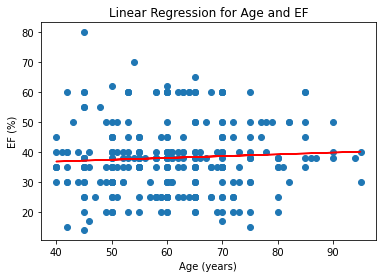

In [111]:
plt.scatter(hf['age'], hf['EF'])
plt.xlabel ('Age (years)')
plt.ylabel ('EF (%)')
plt.title('Linear Regression for Age and EF')

X = hf['age'].values.reshape(-1,1)
Y = hf['EF']

model = sklearn.linear_model.LinearRegression().fit(X,Y)
print('model coefficient = ', model.coef_)
print('model intercept = ', model.intercept_)

lin_pred = model.predict(X)
plt.plot(X, model.predict(X), 'r-');

In [112]:
# Findings:
# no significant correlation between age and EF

#### D. 2.  Modelling for Mortality
            - Naive- Bayes
            - k Nearest Neighbors
            - Random Forest Classification
            - Logistic Regression

#### D.2.a.  Modelling for Mortality using all HF data features

In [114]:
X = hf [['age',
 'sex',
 'smoker',
 'DM',
 'HPN',
 'EF',
 'anemia',
 'Plt',
 'crea',
 'Na',
 'CK', 'Ffup']]
y = hf['mortality']

In [149]:
average_accuracy(GaussianNB(), 'Naive-Bayes')

Naive-Bayes Model for Mortality
 
Accuracy Scores = 
 [0.8, 0.8166666666666667, 0.75, 0.75, 0.8, 0.75, 0.6833333333333333, 0.8333333333333334, 0.75, 0.7333333333333333]

Average Accuracy Score =  0.77


In [147]:
average_accuracy(KNeighborsClassifier(5), 'kNN(5)')

kNN(5) Model for Mortality
 
Accuracy Scores = 
 [0.5666666666666667, 0.5666666666666667, 0.5833333333333334, 0.6, 0.7, 0.6, 0.6666666666666666, 0.6833333333333333, 0.6166666666666667, 0.6166666666666667]

Average Accuracy Score =  0.62


In [148]:
average_accuracy(KNeighborsClassifier(10), 'kNN(10)')

kNN(10) Model for Mortality
 
Accuracy Scores = 
 [0.6666666666666666, 0.7333333333333333, 0.65, 0.6, 0.6666666666666666, 0.6166666666666667, 0.6666666666666666, 0.6166666666666667, 0.6833333333333333, 0.6166666666666667]

Average Accuracy Score =  0.65


In [165]:
average_accuracy(RandomForestClassifier(n_estimators = 100), 'Random Forest Classifer')

Random Forest Classifer Model for Mortality
 
Accuracy Scores = 
 [0.8833333333333333, 0.8, 0.8833333333333333, 0.8666666666666667, 0.8, 0.8166666666666667, 0.8333333333333334, 0.8666666666666667, 0.9, 0.9]

Average Accuracy Score =  0.86


In [166]:
average_accuracy(LogisticRegression(), 'Logistic Regression')

/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression Model for Mortality
 
Accuracy Scores = 
 [0.7666666666666667, 0.85, 0.85, 0.8333333333333334, 0.8, 0.75, 0.7666666666666667, 0.8166666666666667, 0.8666666666666667, 0.8166666666666667]

Average Accuracy Score =  0.81


In [ ]:
# Findings:
# The most accurate model for predicting mortality is the RFC at 86%,
#    followed by LogRegression at 81% and Naive-Bayes at 77%

#### D.2.b.  Modelling for Mortality using Select Features (6)

In [174]:
# Features Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
MinMaxScaler().fit(X_train)
model = RandomForestClassifier(n_estimators=100)
fitted_model = model.fit(X_train, y_train)
pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
Ffup,0.346267
crea,0.119813
age,0.119797
EF,0.100612
CK,0.087022
Plt,0.086447
Na,0.067098
sex,0.019131
HPN,0.014806
anemia,0.014747


In [190]:
X = hf [['age',
 'EF',
 'Plt',
 'CK',
 'crea',
 'Ffup']]
y = hf['mortality']

In [191]:
average_accuracy(GaussianNB(), 'Naive-Bayes')

Naive-Bayes Model for Mortality
 
Accuracy Scores = 
 [0.7666666666666667, 0.7833333333333333, 0.75, 0.7166666666666667, 0.75, 0.7, 0.7666666666666667, 0.7666666666666667, 0.8, 0.7]

Average Accuracy Score =  0.75


In [192]:
average_accuracy(RandomForestClassifier(n_estimators = 100), 'Random Forest Classifer')

Random Forest Classifer Model for Mortality
 
Accuracy Scores = 
 [0.8666666666666667, 0.8, 0.7833333333333333, 0.8166666666666667, 0.7833333333333333, 0.8166666666666667, 0.8333333333333334, 0.85, 0.8833333333333333, 0.8666666666666667]

Average Accuracy Score =  0.83


In [193]:
average_accuracy(LogisticRegression(), 'Logistic Regression')

/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression Model for Mortality
 
Accuracy Scores = 
 [0.8333333333333334, 0.7666666666666667, 0.85, 0.7666666666666667, 0.8166666666666667, 0.8166666666666667, 0.85, 0.8666666666666667, 0.8, 0.8]

Average Accuracy Score =  0.82


/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/MariaMac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
# Findings:
# Mortality modelling using RFC, LogReg and NaiveBayes were 80-84% accurate when the features were trimmed down to 6

#### D.2.c.  Modelling for Mortality using Select Features (3)

In [183]:
X = hf [['age',
 'EF',
 'crea']]
y = hf['mortality']

In [184]:
average_accuracy(GaussianNB(), 'Naive-Bayes')

Naive-Bayes Model for Mortality
 
Accuracy Scores = 
 [0.75, 0.7666666666666667, 0.65, 0.7833333333333333, 0.6666666666666666, 0.7, 0.7, 0.7833333333333333, 0.7666666666666667, 0.7666666666666667]

Average Accuracy Score =  0.73


In [185]:
average_accuracy(RandomForestClassifier(n_estimators = 100), 'Random Forest Classifer')

Random Forest Classifer Model for Mortality
 
Accuracy Scores = 
 [0.7333333333333333, 0.7166666666666667, 0.7333333333333333, 0.8, 0.6833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.8, 0.5833333333333334]

Average Accuracy Score =  0.74


In [186]:
average_accuracy(LogisticRegression(), 'Logistic Regression')

Logistic Regression Model for Mortality
 
Accuracy Scores = 
 [0.7666666666666667, 0.7833333333333333, 0.7166666666666667, 0.75, 0.7333333333333333, 0.7166666666666667, 0.85, 0.7666666666666667, 0.7666666666666667, 0.7333333333333333]

Average Accuracy Score =  0.76


In [ ]:
# Findings:
# Further trimmed to X variables age, EF and crea.  Ffup not included because highly prone to confounding.
# Accuracies were acceptable at 73-76 %
# bubbleplot below illustrates the relationship of these three variables and the mortality outcome

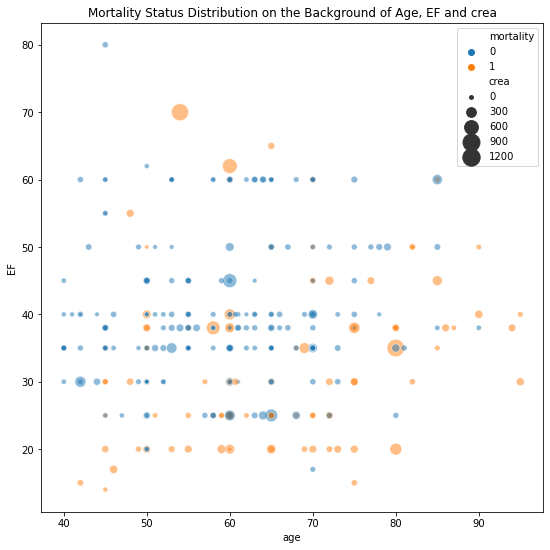

In [188]:
# duplicate for reference
multivariable_bubble('age','EF','crea', 'Age, EF and crea')

In [ ]:
# Summary of Findings for Forecasting:

# Linear Regression for age and EF
#        - no significant correlation between age and EF

# Modelling for Mortality:
# The most accurate model for predicting mortality is the RFC at 86%,
#    followed by LogRegression at 81% and Naive-Bayes at 77%
# Mortality modelling using RFC, LogReg and NaiveBayes were 80-84% accurate when the features were trimmed down to 6
# Further trimmed to X variables age, EF and crea.  Ffup not included because highly prone to confounding.
# Accuracies were acceptable at 73-76 %

#### IV.  Results

A. Univariate Analyses
    1.  Age - the cohort distribution started at the 40's and peaked at 60's, tapering towards the advanced age group (mean 60 +/- 11 years, range 40-95)
    2.  Sex - Majority of the cohort was male (65%)
    3.  Smoker - Only a minority were smokers (32%)
    4.  DM - Almost half of the cohort was diabetic (42%)
    5.  HPN - Only a minority were hypertensive (34%)
    6.  EF - The EF of the cohort was overall low (mean 38 +/- 11, range 14-80).  But, there was atleast a 10% subset with EF of 60 or higher
    7.  Anemia - Almost half of the cohort were anemic (43%)
    8.  Platelet - Majority of the population had normal platelet counts.  Almost 3% of the population had counts below 100, and 7% had counts above 400
    9.  Crea - Majority of the cohort had normal crea levels.  Almost 12% of the population had crea above 200
    10. Na - Majority had normal serum Na.  Levels below 130 was evident in 7%, and higher than 140 in 14% 
    11. CK - CK levels were overall low (median 250, range 23-7861)
    12.  Ffup - The duration of follow-up was in general short (mean 130 +/- 77, range 4 - 285 days).  No pattern appreciated.
    13.  Mortality - There is a high cohort mortality at 32.1%

B.  Bivariate Analyses:
    1.  Mortality increased with:
        a. advancing age group
        b. hypertension
        c. EF lower than 30
            - at EF <=10, mortality rates reach 80%
        d. anemia
        e. low platelet counts <=100
        f. creatinine >200
            - at crea level >500, mortality rates reach 80%
        g. low serum Na <= 130
        h. short Ff-up <= 60 days
    2.  Mortality distribution was not influenced by:
        a. sex
        b. smoking status
        c. DM status
    3.  Mortality distribution equivocal:
        a. CK 
            - mortality baseline was already high (32%) at low/ normal CK levels <500.  
            - mortality further increases (57%) at high CK levels of >= 3000
            - mortality pattern on mid-CK values not apparent

C. Multivariate Analyses
    1.  There is a tendency for younger deaths among patients who have HF associated with hypertension and anemia
    2.  There is a tendency for mortality on HF patients with low EF and are non-hypertensive.
    3.  Mortalities are clustered around the first 60 days of follow-up, especially for those with low EFs.  After the initial 60 days, survival is mostly sustained for the next 100 days, especially those with EF of 30 and above.
    4.  High crea levels are associated with low EF mortalities.  
    5.  There seems to be a association with mortality for low EF and low CK levels.  This could lead to a hypothesis generation:  Are the heart muscles too degenerated to release high amounts of CK during periods of further stress?
    6.  There is a trend for short duration of follow-up (which could be a surrogate for early mortality) among patients with low EF and advanced age.

D. Forecasting
    1. The deterioration in EF cannot be explained by advancing age.
    2. Mortality rates for HF patients can be modelled using the Random Forest Classification, Logistic Regression or Naive-Bayes models, using the variables of age, EF and creatinine, with an accuracy rate of 75%
    3.  Increasing the variables to include Platelet count, CK and Ffup increases the accuracy to 80%.

#### V.  Conclusion

Mortality is associated with advanced age, decreased EFs, elevated creatinine levels, decreased platelet counts, decreased sodium levels and anemia.  Mortality is apparent either with low or very elevated CK values.  Sex, DM, hypertension and smoking status were not associated with mortality.  Higher mortality was more evident with shorter follow-up periods.

#### VI.  Limitations and Recommendations

The analysis was done on a dataset that was donated for open use.  The determination of variables and collection of data were not performed by the present author.

The data was gathered by Ahmad et al (2017) from admitted patients in 2015 in a single institution.  The original paper did not mention if the data collection was prospective or retrospective.  The original data was revised and donated by Chicco and Jurman (2020).

The model can provide a general overview in predicting mortality for heart failure patients, however, a more robust dataset and analysis will be needed before it can be advocated for clinical use.  Important variables specific to HF diagnosis and treatment should be incorporated.  The model should also be reviewed frequently due to the fast development of medications and technology that revise the life patterns of HF patients.

Significant parallel studies could be done on Quality of Life, as well as Cost-Adjustment parameters.